# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


**(1) Create a 10x10 grid to visualize 10 examples of each digit.**

Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

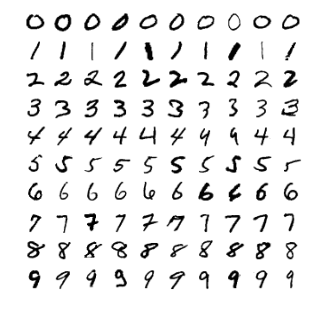

In [3]:
### STUDENT START ###
def P1(num_examples=10):
    # parameters (OPT): num_examples = number of examples

    # set the color map as black and white
    plt.rc("image", cmap="binary") 
    # set  figure size as 5in x 5in
    plt.figure(figsize=(5,5)) 
    # initialize sub-plot no.
    subplotno = 1  
    # find unique labels in the data set
    uniq_labels = np.unique(mini_train_labels)
    
    # plot 10x10 grid to visualize 10 examples of each digit
    for i in uniq_labels:
        # plot occurences of each digit in its own sub-plot
        # set sub-plot no, turn axis off and show image
        for x in np.where(mini_train_labels == i)[0][:10]:
            # set sub-plot
            plt.subplot( len(uniq_labels), num_examples, subplotno)
            # turn off axis
            plt.axis('off')
            # show image
            plt.imshow(mini_train_data[x].reshape(28, 28)) 
            subplotno += 1

# call P1 function
P1(10)

### STUDENT END ###

**(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?**

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
### STUDENT START ###

# P2 function to determine accuracy of the model
def P2(k_values):
    # Signature
    # Parameters (REQ): k_values = k-nearest neighbors

    # (i) Determine Accuracy
    print "Reporting accuracy on the dev set by training K-Nearest-Neighbors model \nwith k = [1,3,5,7,9] using the mini training set"
    print "\n%2s | %s" % ("k", "Accuracy")
    # run K neighbors classifier with varying k to classify the data
    for k in k_values:
        # run k-neighbor classifier learning
        knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        # calculate accuracy by fitting the model with dev data set
        print "%2d | %2.2f" % (k, knn.fit(mini_train_data, mini_train_labels).score(dev_data, dev_labels))

    # (ii) Precision, Recall and F1 score for k = 1
    print "\nCalculating precision, recall, and F1 for each label with k = 1"
    print "- Precision is measure of 'false positives'"
    print "- Recall is measure of 'false negatives'"
    print "- F1 score is weighted average of the precision and recall"
    # run k-neighbor classifier learning
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    # fit training data to the model
    knn.fit(mini_train_data, mini_train_labels)
    print "\nClassification report for K-Nearest_Neighbor, k = 1\n"
    # print classification report for available data labels
    y = np.array(["%d" % w for w in np.unique(mini_train_labels)])
    print classification_report(dev_labels, knn.predict(dev_data), target_names=y)
        
# Call P2 function with varying k values
k_values = [1, 3, 5, 7, 9]
P2(k_values)

### STUDENT END ###

Reporting accuracy on the dev set by training K-Nearest-Neighbors model 
with k = [1,3,5,7,9] using the mini training set

 k | Accuracy
 1 | 0.89
 3 | 0.88
 5 | 0.87
 7 | 0.86
 9 | 0.86

Calculating precision, recall, and F1 for each label with k = 1
- Precision is measure of 'false positives'
- Recall is measure of 'false negatives'
- F1 score is weighted average of the precision and recall

Classification report for K-Nearest_Neighbor, k = 1

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0

**ANSWER:** 

9 is the most difficult digit to predict relative to other digits. Digit 9 has a high false-positive rate of 0.78 (precision) next to digit 3 as well as a high false-negative rate of 0.82 (recall) next to digit 2. The weighted average of recall and preciision i.e F1-score is lowest of all of the digits at 0.80, indicating it is the most difficult to predict correctly.

**(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.**

- time.time() gives a wall clock value you can use for timing operations

In [5]:
### STUDENT START ###
# P3 function to determine accuracy of the classifier by varying training sizes
def P3(train_sizes):
    # Signature
    # Parameters (REQ): train_sizes = varying training set data sizes
    print "%6s | %s | %s" % ("Size", "Accuracy", "Elapsed Time (sec)")
    
    # instantiating classifier with k = 1
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

    # Calculate accuracy for each training size
    for size in train_sizes:
        # start time
        start = time.time()  
        # train the classifier and measure accuracy against dev data
        score = knn.fit(train_data[:size], train_labels[:size]).score(dev_data, dev_labels)
        accuracies.append(score)
        # end time
        end = time.time()
        print('%6d | %1.4f   | %8.2f' %(size, score, end-start))
    
# call P3 to report accuracy of the classifier
train_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000])
# accuracies will be used in P4
accuracies = []
P3(train_sizes)


### STUDENT END ###

  Size | Accuracy | Elapsed Time (sec)
   100 | 0.7200   |     0.16
   200 | 0.7860   |     0.31
   400 | 0.8410   |     0.66
   800 | 0.8840   |     1.50
  1600 | 0.9020   |     2.81
  3200 | 0.9260   |     5.44
  6400 | 0.9370   |    11.92
 12800 | 0.9590   |    25.30
 25000 | 0.9700   |    51.12


**(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?**

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
### STUDENT START ###
def P4():
    training_size_n = 60000

    # set X and y parameters with
    # X as training sizes from P3
    # Y as accuracies calculated for training size in P3
    X = np.array(train_sizes)[:, np.newaxis]
    y = np.array(accuracies)

    print "%20s | %10s | %10s | %10s" % ("Transformation", "N", "Score", "Mean Sq Error")
    
    # Linear Regression with no transformation
    lm = LinearRegression()
    # fit linear regression model using training data and labels
    lm.fit(X, y)
    # predict for training size n
    predicted_accuracy = lm.predict([training_size_n])
    mean_sq_err = np.mean((predicted_accuracy-y)**2)
    print "%20s | %10s | %10.6s | %10.6s" % ("No Transformation", training_size_n, predicted_accuracy, mean_sq_err)
   
    # Linear Regression with square root transformation
    # fit linear regression model using training data and labels
    lm.fit(np.sqrt(X), y)
    # predict for training size n
    predicted_accuracy = lm.predict([np.sqrt(training_size_n)])
    mean_sq_err = np.mean((predicted_accuracy-y)**2)
    print "%20s | %10s | %10.6s | %10.6s" % ("Square Root", training_size_n, predicted_accuracy, mean_sq_err)

    # Linear Regression with log transformation
    # fit linear regression model using training data and labels
    lm.fit(np.log(X), y)
    # predict for training size n
    predicted_accuracy = lm.predict([np.log(training_size_n)])
    mean_sq_err = np.mean((predicted_accuracy-y)**2)
    print "%20s | %10s | %10.6s | %10.6s" % ("Log", training_size_n, predicted_accuracy, mean_sq_err)

    # Linear Regression with sigmoid transformation
    sigmoid = np.vectorize(lambda(x): 1.0/(1.0+np.exp(-x)))
    # fit linear regression model using training data and labels
    lm.fit(sigmoid(X), y)
    # predict for training size n
    predicted_accuracy = lm.predict([sigmoid(training_size_n)])
    mean_sq_err = np.mean((predicted_accuracy-y)**2)
    print "%20s | %10s | %10.6s | %10.6s" % ("Sigmoid", training_size_n, predicted_accuracy, mean_sq_err)

P4()
### STUDENT END ###

      Transformation |          N |      Score | Mean Sq Error
   No Transformation |      60000 |     1.2430 |     0.1376
         Square Root |      60000 |     1.1308 |     0.0689
                 Log |      60000 |     1.0338 |     0.0297
             Sigmoid |      60000 |     0.8805 |     0.0062


ANSWER:
* Regression model predicts accuracy of 1.243 without any transformation, which does not seem to be possible when the maximum accuracy expected is 1.0. As evident from the transformations applied, logarithmic transformation is more closer to prediction between training data size and accuracy. The best transformation that gives more closer and realistic prediction is sigmoid transformation with accuracy of 0.88.  
* Square root transformation helps to correct the slope of the regression line but with n = 60000 the predicted accuracy is still over 1.
* Applying logarithmic transformation exceeds little over 1 in its prediction but has the strong softening effect on the accurate predictions.
* Sigmoid function bounds the transformed values between 0 and 1 for all defined input values i.e. classifying the data as 1 or 0 and limiting the accuracy between 0 and 1
* One more interesting parameter to observe is the mean squared error between predicted targets and real targets. The mean squared error dampens with sigmoid transformation at 0.6% when compared to log (2.9%), sqrt (6.89%) and no transformation (13.76%).

**(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.**

- confusion_matrix() produces a confusion matrix

Confusion Matrix for Dev data fitted to 1-NN classifier
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


Visualizing Confusion Matrix for Dev data fitted to 1-NN classifier


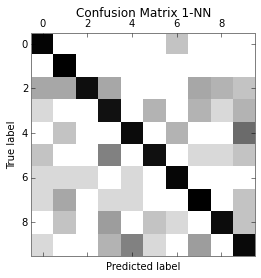



Top most confused predictions in tuples (actual, predicted)
[(4, 9), (5, 3), (8, 3), (9, 4), (9, 7)]


Plotting the top N confused predictions
Actual Digit: 4, Predicted Digit: 9


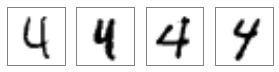

Actual Digit: 5, Predicted Digit: 3


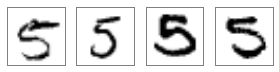

Actual Digit: 8, Predicted Digit: 3


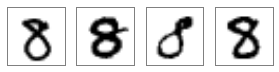

Actual Digit: 9, Predicted Digit: 4


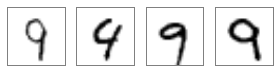

Actual Digit: 9, Predicted Digit: 7


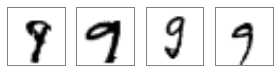

In [8]:
### STUDENT START ###
def P5(top_n = 10):
    # Signature
    # Parameters (OPT): top_n = top N samples from confusion matrix to show

    # Fit data to kNN classifier with  k =1
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)
    y_pred = knn.predict(dev_data)
    y_true = dev_labels
    cm = confusion_matrix(y_true, y_pred)
    print "Confusion Matrix for Dev data fitted to 1-NN classifier"
    print cm
    print "\n"
    
    # Plot confusion matrix data to give an idea about the confused digits
    # Log of CM values separates about the confusing entries better
    print "Visualizing Confusion Matrix for Dev data fitted to 1-NN classifier"
    plt.matshow(np.log(1+cm), cmap = plt.get_cmap('gray_r'))
    plt.title('Confusion Matrix 1-NN')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print "\n"
    
    # Identify most confused entries by excluding the correct predictions
    # i.e. diagonal entries in the matrix
    cm_confused = []
    for idx, val in enumerate(np.array(cm).reshape(100)):
        if idx not in [ 10*x + x for x in range(10)]:
            cm_confused.append(val)
            
    # top N values
    top_values = sorted(cm_confused)[-top_n:]
    # determine the actual (i) and predicted (j) labels where 
    # top N values are located in the confusion matrix
    top_confusions = [ (i,j) for i in range(10) for j in range(10) if cm[i][j] in top_values ]
    print "Top most confused predictions in tuples (actual, predicted)"
    print top_confusions
    print "\n"

    print "Plotting the top N confused predictions"
    for actual, predicted in top_confusions:
        # New plot for each confused pair of actual and predicted digit
        fig = plt.figure()
        subplot_count = 1
        
        # plot examples for each confused prediction
        for idx, val in enumerate(y_pred):
            if dev_labels[idx] == actual and val == predicted:
                # Add subplot and labels
                ax = fig.add_subplot(1, top_n, subplot_count)
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)                

                # Plot the image
                plt.rcParams['axes.edgecolor'] = 'gray'
                plt.rcParams['image.cmap'] = 'gray_r'
                plt.imshow(dev_data[idx].reshape((28,28)))
                
                # Break after showing top n examples
                subplot_count += 1
                if subplot_count >= top_n: 
                    break

        # show plot
        print "Actual Digit: %s, Predicted Digit: %s" % (actual, predicted)
        plt.show()

P5(5)
### STUDENT END ##

**(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.**

**Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:**
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data


Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Ensuring Gaussian blurring works on the random examples from mini train data


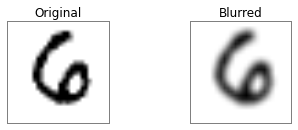

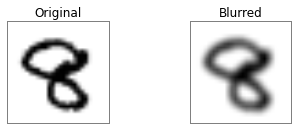

Blurring training data...
Blurring dev data...


Applying No Filter
Accuracy: 0.888


Applying Filter 1: Blur only training data
Accuracy: 0.91


Applying Filter 2: Blur only dev data
Accuracy: 0.873


Applying Filter 3: Blur both training and dev data
Accuracy: 0.901


In [9]:
### STUDENT START ###
def P6():
    # Ensure Gaussian blurring works by showing random examples
    print "Ensuring Gaussian blurring works on the random examples from mini train data"
    no_of_examples = 2 
    example_idx = np.random.randint(0, len(mini_train_data), no_of_examples)

    plt.rc("image", cmap="binary") 
    subplotno = 1  

    for idx in example_idx:
        example_img = apply_gaussian_blur_filter(np.array([mini_train_data[idx]]))

        # Plot a random example of the Gaussian blur 
        # original
        ax = plt.subplot(no_of_examples, 2, subplotno)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title('Original')
        plt.imshow(mini_train_data[idx].reshape(28,28))
        subplotno += 1
        # blurred
        ax = plt.subplot(no_of_examples, 2, subplotno)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title('Blurred')
        plt.imshow(example_img.reshape(28,28))
        subplotno += 1
        #show plot
        plt.show()

    # Pre-processing
    # Blur both training and dev data sets
    print "Blurring training data..."
    mini_train_data_blur = apply_gaussian_blur_filter(mini_train_data)
    
    print "Blurring dev data..."
    dev_data_blur = apply_gaussian_blur_filter(dev_data)
    
    print "\n"

    # Let's see without applying any blur filter on the training 
    # data and dev data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    knn_predictions = knn.predict(dev_data)
    
    score = knn.score(dev_data, dev_labels)
    print "Applying No Filter"
    print "Accuracy: %s" % (score)
    # print classification_report(dev_labels, knn_predictions)
    
    print "\n"
    
    # Filter 1: Applying blur filter on the training data 
    # only but not the dev data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data_blur, mini_train_labels)
    knn_predictions = knn.predict(dev_data)
    
    score = knn.score(dev_data, dev_labels)
    print "Applying Filter 1: Blur only training data"
    print "Accuracy: %s" % (score)
    # print classification_report(dev_labels, knn_predictions)
    
    print "\n"
    
    # Filter 2: Applying blur filter on the dev data only
    # but not the training data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    knn_predictions = knn.predict(dev_data_blur)
    
    score = knn.score(dev_data_blur, dev_labels)
    print "Applying Filter 2: Blur only dev data"
    print "Accuracy: %s" % (score)
    # print classification_report(dev_labels, knn_predictions)

    print "\n"
    
    # Filter 3: Applying blur filter on the training data and
    # dev data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data_blur, mini_train_labels)
    knn_predictions = knn.predict(dev_data_blur)
    
    score = knn.score(dev_data_blur, dev_labels)
    print "Applying Filter 3: Blur both training and dev data"
    print "Accuracy: %s" % (score)
    # print classification_report(dev_labels, knn_predictions)

def apply_gaussian_blur_filter(image):
    # Gaussian kernel calculated from
    # http://dev.theomader.com/gaussian-kernel-calculator/
    # Using mean = 0, sigma = 1.5
    gaussian_kernel = np.array([
            0.095332, 0.118095, 0.095332,
            0.118095, 0.146293, 0.118095,
            0.095332, 0.118095, 0.095332])

    gaussian_kernel = gaussian_kernel.reshape(3,3)

    # define gaussian smoothed image
    gaussian_image = [ ]
        
    # loop through images
    for img in image:
        # reshape image to (28, 28)
        img = img.reshape(28,28)
        blur = [ ]
        
        # for each pixel calculate weighted average with weights 
        # from pre-defined and normalized Gaussian Kernel
        for i in range(len(img)):
            for j in range(len(img[i])):
                cuml_sum = 0
                    
                # weighted average of the pixel and its neighbors
                for k in range(3):
                    for l in range(3):
                        # get the neighboring pixel value for the current pixel
                        # for the pixels along the outer edge set it to 0.0 
                        # using try/except block
                        try:
                            neighbor_pixel_val = img[i+(k-1)][j+(l-1)]
                        except:
                            neighbor_pixel_val = 0.0
                        
                        # convolute current pixel with gaussian kernel value
                        cuml_sum += neighbor_pixel_val * gaussian_kernel[k][l]
                    
                # append the accumulated sum  to blur
                blur.append(cuml_sum)

        # append convolute value to the blurred/smoothed image 
        gaussian_image.append(blur)
    return np.array(gaussian_image)
    
P6()
### STUDENT END ###

ANSWER:

Gaussian kernel applied was a weighted average with sigma = 1.5 and mean = 0. Looking at the results, applying blur filter only on training data gives best results with highest accuracy of 91%.

**(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?**

In [20]:
### STUDENT START ###
def P7():
    # fit training data to Bernoulli Naive Bayes Classifier
    # binarize argument labels pixel values as 1 or 0 based
    # on the threshold defined
    bnb = BernoulliNB(binarize = 0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    # predict dev data using BernoulliNB classifier
    bnb_predictions = bnb.predict(dev_data)
    # confusion matrix
    bnb_cm = confusion_matrix(dev_labels, bnb_predictions)

    # pre-processing data to map the pixel values to 0, 1, or 2, representing white, grey, or black
    # multiply each pixel value with 2.999 (<3) to range of values to 0 <= x <3
    # convert resultant array as integer data type to map values 0, 1 or 2
    #P = 2.999
    #multi_label_train_data = np.array(P * mini_train_data).astype(int)
    #multi_label_dev_data = np.array(P * dev_data).astype(int)
    
    # another approach to pre-process based on pixel value
    g = np.vectorize(lambda x: 0 if x <= 0.33 else 1 if (x > 0.33 and x<=0.67) else 2)
    multi_label_train_data = g(mini_train_data)
    multi_label_dev_data = g(dev_data)
    
    # check to make sure pre-processing worked
    example_idx = np.random.randint(0, len(multi_label_train_data))
    #print multi_label_train_data[example_idx].reshape(28,28)
    print "\n"
    
    mnb = MultinomialNB()
    mnb.fit(multi_label_train_data, mini_train_labels)
    mnb_predictions = mnb.predict(multi_label_dev_data)
    mnb_cm = confusion_matrix(dev_labels, mnb_predictions)
    
    # determine accuracy
    print "Accuracy with Bernoulli NB: %s" % (bnb.score(dev_data, dev_labels))
    print "Accuracy with Mutinomial NB: %s" % (mnb.score(dev_data, dev_labels))
    print "\n"
    
    # show classification reports for comparison
    print "Classification report for Bernoulli NB"
    print(classification_report(dev_labels, bnb_predictions))
    
    print "Classification report for Multinomial NB"
    print(classification_report(dev_labels, mnb_predictions))

    # analyze confusion matrix to find most confused digits by each model
    print "Confusion Matrix for Bernoulli NB"
    print bnb_cm

    print "\n"

    print "Confusion Matrix for Mutinomial NB"
    print mnb_cm

P7()
### STUDENT END ###



Accuracy with Bernoulli NB: 0.817
Accuracy with Mutinomial NB: 0.797


Classification report for Bernoulli NB
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.82      0.93      0.87       105
        2.0       0.85      0.79      0.82       102
        3.0       0.62      0.74      0.67        86
        4.0       0.90      0.79      0.84       104
        5.0       0.85      0.62      0.71        91
        6.0       0.89      0.87      0.88        98
        7.0       0.92      0.80      0.85       113
        8.0       0.75      0.80      0.77        96
        9.0       0.71      0.82      0.76       106

avg / total       0.83      0.82      0.82      1000

Classification report for Multinomial NB
             precision    recall  f1-score   support

        0.0       0.90      0.97      0.93        99
        1.0       0.88      0.91      0.90       105
        2.0       0.85      0.81      0.83      

ANSWER:
* It's evident that the **Multinomial NB model is less accurate than the Bernoulli NB model** for the data set used.

* Based on my understannding on the both the [Naive Bayes model](http://scikit-learn.org/stable/modules/naive_bayes.html), Bernoulli NB penalizes the model for missing features. This might be the reason for better accuracy. This could be confirmed from the confusion matrix where Bernoulli NB model had more predictions than the Binomial

* By looking at the precisions in the clasification report, both the digits 8 and 9 were challenging Multinomial NB relative to Bernoulli NB 

**(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?**

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [16]:
### STUDENT START ###
def P8(alphas):
    # Fit Bernoulli NB with training data 
    bnb = BernoulliNB(binarize = 0.5)
    # Use GridSearchCV to fit and predict with varying alphas
    gs = GridSearchCV(bnb, alphas)
    gs.fit(mini_train_data, mini_train_labels)
    
    # print accuracies for each alpha
    print "%6s | %8s" %("Alpha", "Accuracy")
    for params, mean, scores in gs.grid_scores_:
        print "%6s | %s" % (params['alpha'], mean)

    return gs

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
### STUDENT END ###

 Alpha | Accuracy
   0.0 | 0.092
0.0001 | 0.818
 0.001 | 0.82
  0.01 | 0.821
   0.1 | 0.816
   0.5 | 0.803
   1.0 | 0.802
   2.0 | 0.797
  10.0 | 0.76


In [17]:
print nb.best_params_

{'alpha': 0.01}


ANSWER:

* The best value for alpha is 0.01 and the accuracy at alpha=0 is the lowest at 0.0920

* Low accuracy at alpha = 0 is expected. Alpho = 0 indicates that no smoothing is applied so if there is any missing data for a feature in the training data (i.e. 0 for all values) during the model fit then it will have a probability of 0 during prediction. 

* Failing to realize missing features explains lower than expected posterior probabilities (i.e. uncertainty of assessing an observation to a particular label). Further leading to failure in generalizing the model to new data.


**(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.**

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Original Accuracy with Gaussian NB: 0.627

Classification Report with Gaussian NB

             precision    recall  f1-score   support

        0.0       0.76      0.84      0.80        99
        1.0       0.82      0.89      0.85       105
        2.0       0.62      0.40      0.49       102
        3.0       0.62      0.47      0.53        86
        4.0       0.80      0.39      0.53       104
        5.0       0.52      0.37      0.44        91
        6.0       0.69      0.88      0.77        98
        7.0       0.85      0.50      0.63       113
        8.0       0.41      0.61      0.49        96
        9.0       0.47      0.88      0.61       106

avg / total       0.66      0.63      0.62      1000

Gaussian NB model has difficuly predicting the digit 5 (lowest F1-score)
Visualize mean and stddev from the Gaussian Model to produce the probabilities for digit 5


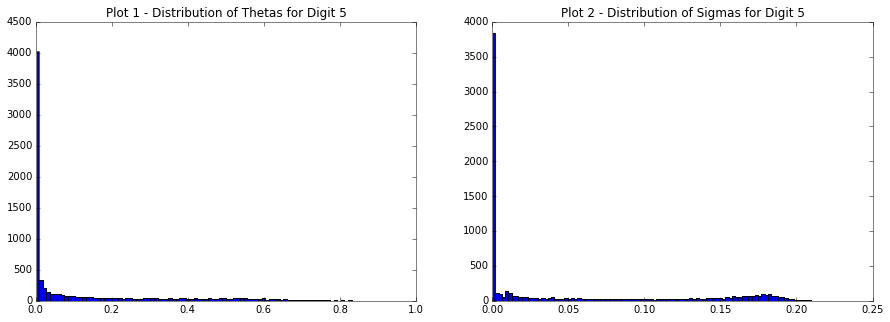

Plotting Sigma vs Theta distribution on original Gaussian NB model


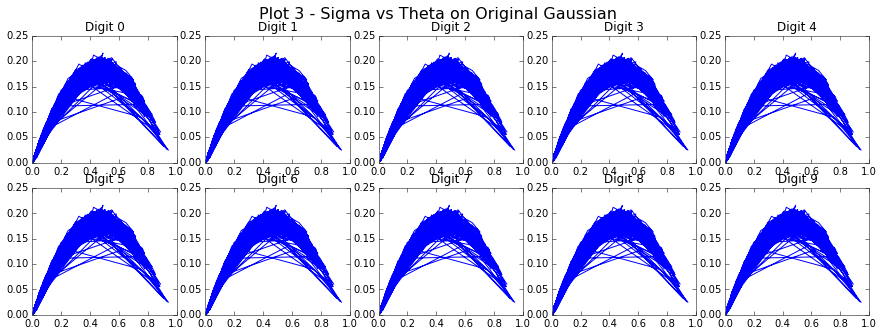

Visualizing number of features with zero means and standard deviation of 1e-05


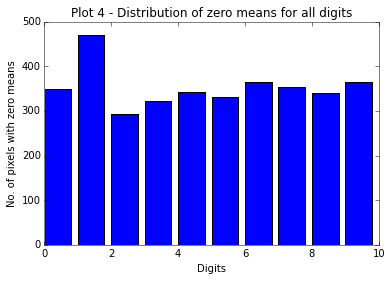

Compensating original Gaussian model by 
 (i)  increasing the standard deviation by 0.019 for all features and
 (ii) blurring the image by applying Gaussian filter
Accuracy with modified Gaussian NB: 0.818

             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94        99
        1.0       0.79      0.96      0.87       105
        2.0       0.86      0.79      0.83       102
        3.0       0.69      0.74      0.72        86
        4.0       0.92      0.69      0.79       104
        5.0       0.80      0.74      0.77        91
        6.0       0.88      0.86      0.87        98
        7.0       0.93      0.78      0.85       113
        8.0       0.78      0.72      0.75        96
        9.0       0.66      0.85      0.74       106

avg / total       0.82      0.81      0.81      1000



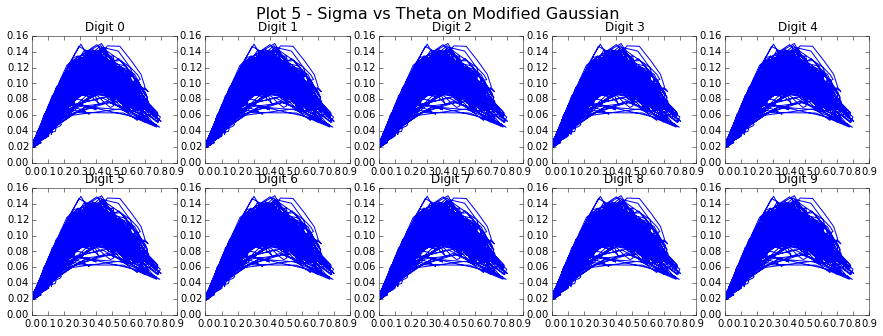

In [18]:
### STUDENT END ###

def P9():
    # Evaluate original performance of GaussianNB 
    # without changing meta parameters
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    gnb_predictions = gnb.predict(dev_data)   
    print "Original Accuracy with Gaussian NB: %s\n" % (gnb.score(dev_data, dev_labels))

    print "Classification Report with Gaussian NB\n"
    print classification_report(dev_labels, gnb_predictions)
    print "Gaussian NB model has difficuly predicting the digit 5 (lowest F1-score)"
    print "Visualize mean and stddev from the Gaussian Model to produce the probabilities for digit 5"
    
    # from classification report it's evident model has difficuly with predicting the digit 5
    # Visualize mean and stddev from the Gaussian Model to produce the probabilities for digit 5
    thetas = gnb.theta_.reshape(len(gnb.theta_) * len(gnb.theta_[5]))
    sigmas = gnb.sigma_.reshape(len(gnb.sigma_) * len(gnb.sigma_[5]))

    f, ax = plt.subplots(1, 2, figsize = (15,5))
    ax1 = plt.subplot(1, 2, 1)
    plt.title("Plot 1 - Distribution of Thetas for Digit 5")
    ax1.hist(thetas, bins = 100)
    ax1 = plt.subplot(1, 2, 2)
    plt.title("Plot 2 - Distribution of Sigmas for Digit 5")
    ax1.hist(sigmas, bins = 100)
    plt.show()  
    
    print "Plotting Sigma vs Theta distribution on original Gaussian NB model"
    f, ax = plt.subplots(2, 5, figsize = (15,5))
    plt.suptitle('Plot 3 - Sigma vs Theta on Original Gaussian', size = 16)
    subplotno = 1
    for i in range(10):
        thetas = gnb.theta_.reshape(len(gnb.theta_) * len(gnb.theta_[i]))
        sigmas = gnb.sigma_.reshape(len(gnb.sigma_) * len(gnb.sigma_[i]))
        ax = plt.subplot(2, 5, subplotno)
        plt.title("Digit " + str(i))
        plt.plot(thetas, sigmas)
        subplotno += 1
    plt.show()
    
    # plot # of features with mean and stddev near zero for all digits
    print "Visualizing number of features with zero means and standard deviation of 1e-05"
    zero_means = []
    for i in range(10):
        z = [x for idx, x in enumerate(gnb.sigma_[i]) if x <= 1e-05 and gnb.theta_[i][idx] == 0.0]
        zero_means.append(len(z))

    plt.figure()
    plt.bar(range(10), zero_means)
    plt.title("Plot 4 - Distribution of zero means for all digits")
    plt.xlabel('Digits')
    plt.ylabel('No. of pixels with zero means')
    plt.show()
    
    # distribution does not seem to be good. Most of the features have mean 0.0 and std dev of 1e-05
    # e.g. for digit 5, 332 pixels (42%) of 784 features have mean 0.0, std dev 1e-09
    # i.e. classifier produces very low probabilities if a pixel is filled where feature was missing in the training.
    # This can be compensated by 
    #    (i)  increasing the standard deviation (thetas)
    #    (ii) blurring the image i.e. adding noise as we have seen before this increases accuracy
    # define gaussian model
    print "Compensating original Gaussian model by "
    print " (i)  increasing the standard deviation by 0.019 for all features and"
    print " (ii) blurring the image by applying Gaussian filter"
    gnb = GaussianNB()
    # blur image by applying guassian filter
    mini_train_data_blur = apply_gaussian_blur_filter(mini_train_data)
    gnb.fit(mini_train_data_blur, mini_train_labels)

    # increase standard deviation for all of the Gaussian NB model
    # chose 0.019 based on the sigma vs theta plot distribution where
    # theta was peaking around 0.02
    gnb.sigma_ = gnb.sigma_ + 0.019
    # predicting with new Gaussian NB
    gnb_predictions = gnb.predict(dev_data)
   
    print "Accuracy with modified Gaussian NB: %s\n" % (nb.score(dev_data, dev_labels))
    print(classification_report(dev_labels, gnb_predictions))
    
    f, ax = plt.subplots(2, 5, figsize = (15,5))
    plt.suptitle('Plot 5 - Sigma vs Theta on Modified Gaussian', size = 16)
    subplotno = 1
    for i in range(10):
        thetas = gnb.theta_.reshape(len(gnb.theta_) * len(gnb.theta_[i]))
        sigmas = gnb.sigma_.reshape(len(gnb.sigma_) * len(gnb.sigma_[i]))
        ax = plt.subplot(2, 5, subplotno)
        plt.title("Digit " + str(i))
        plt.plot(thetas, sigmas)
        subplotno += 1
    plt.show()

gnb = P9()
### STUDENT END ###

ANSWER:

From the classification report it's evident the original classifier has difficulty predicting the digit 5. From the histograms of the means and standard deviations,  about 42% of the features for the digit 5 had very small mean and standard deviation. This is true for most of the digits. For those missing features, classifier produces very low probabilities if a pixel is filled in the test data where feature was missing in the training. Thereby penalizing the model.

To compensate the original Gaussian model, two fixes were made

    (i)  increased all of the sigma values by 0.0198 (from the sigma-theta distribution of original model Plot 3)
    (ii) blurred the original image by applying Gaussian filter (used in P7) 

The accuracy increased to 81.8 much nearer to the BernoulliNB and MultinomialNB models.

**(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?**

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

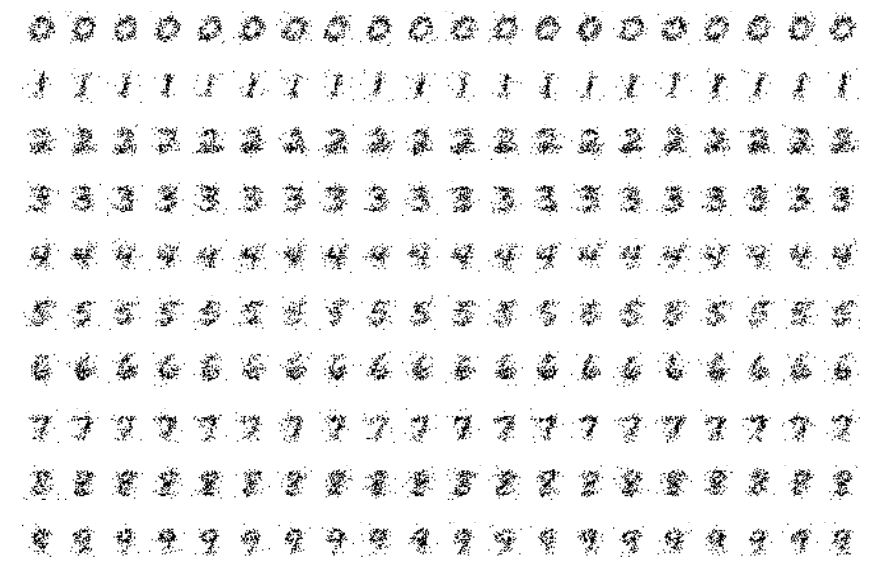

In [19]:
### STUDENT START ###

def P10(num_examples):
    # fit training data to Bernoulli NB model 
    # with  pixel output as 1 or 0 (binarize = 0.5)
    bnb = BernoulliNB(binarize=0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    
    plt.rcParams['axes.edgecolor'] = 'gray'
    plt.rcParams['image.cmap'] = 'binary_r'
    plt.rcParams['figure.figsize'] = (15,10)
    
    # for each label
    for i in range(len(bnb.feature_log_prob_)):
        # for number of examples
        for j in range(num_examples):
            # generate random values as hypothetical 
            # probabilities for each feature
            img = np.random.rand(784)

            # turn the pixel "on" if the randomly generated probability 
            # is greater than the probability in the model
            # int casts value to 1 or 0
            for idx, pix in enumerate(img):
                img[idx] = int(pix > np.exp(bnb.feature_log_prob_[i][idx]))
            
            # plot the digit
            ax = plt.subplot(len(bnb.feature_log_prob_), num_examples, i*num_examples + j + 1)
            plt.axis('off')
            plt.imshow(img.reshape((28,28)))
    # show the plot
    plt.show()

P10(20)
### STUDENT END ###

ANSWER:

Some of the generated digits are closer to the training labels but some are too hard to identify. This is expected due to the Naive Bayes independence assumption that a single pixel (feature) being "on" will not have any impact on whether the next one is on or off. 

**(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.**

**Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.**

**How would you characterize the calibration for the Naive Bayes model?**

In [21]:
### STUDENT START ###
def P11(buckets, correct, total):
    bnb = BernoulliNB(binarize = 0.5, alpha = 0.01)
    bnb.fit(mini_train_data, mini_train_labels)
    
    for i, X in enumerate(dev_data):
        # Get the maximum posterior probability
        max_post_prob = max(bnb.predict_proba(X)[0])
  
        for idx, val in enumerate(buckets):
            # Assign the right bin by checking  max probability
            if max_post_prob <= val:
                total[idx] += 1.0
                # if the predicted label is same as actual label 
                # increment correct count
                if bnb.predict(X)[0] == dev_labels[i]:
                    correct[idx] += 1.0
                # once bin is assigned, move on
                break 

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) >= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

### STUDENT END ###

p(pred) >= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) >= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) >= 0.9990000000000    total =  87    accuracy = 0.460
p(pred) >= 0.9999900000000    total =  84    accuracy = 0.619
p(pred) >= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) >= 0.9999999990000    total =  59    accuracy = 0.763
p(pred) >= 0.9999999999900    total =  76    accuracy = 0.868
p(pred) >= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) >= 1.0000000000000    total = 531    accuracy = 0.953


ANSWER:

I chose alpha as 0.01 based on the earlier finding that alpha = 0.01 has better accuracy. 

Interpreting the results
- Accuracy increases as posterior probabilities increase and the model is weakly calibrated 
- The model associates high posterior probabilities with much lower accuracy which is symptom of an overconfident model

**(12) EXTRA CREDIT**

**Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. **

Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [23]:
### STUDENT START ###
def P12():
    trn_data_new = np.copy(mini_train_data)
    dev_data_new = np.copy(dev_data)

    train_reshape = trn_data_new.reshape(len(trn_data_new), 28, 28)
    dev_reshape = dev_data_new.reshape(len(dev_data_new), 28, 28)

    # FEATURE EXTRACTION 1: SUMMING PIXEL VALUES ROW AND COLUMN WISE
    print "ADDING FEATURE 1: SUMMING PIXEL VALUES ROW AND COLUMN WISE"
    # Get horizontal pixel sum i.e. row-wise sum
    trn_data_hori_sum = np.sum(train_reshape, axis = 2)
    dev_data_hori_sum = np.sum(dev_reshape, axis = 2)

    # Get vertical pixel sum i.e. column-wise sum
    trn_data_vert_sum = np.sum(train_reshape, axis = 1)
    dev_data_vert_sum = np.sum(dev_reshape, axis = 1)

    # FEATURE EXTRACTION 2: ADDING PCT WHITE PIXELS FROM LEFT, RIGHT, TOP and BOTTOM OF IMAGE
    print "ADDING FEATURE 2: PERCENTAGE OF WHITE PIXELS FROM LEFT, RIGHT, TOP and BOTTOM OF THE IMAGE"
    # whitening pixel values: white when pixel val = 0.0 else non-white
    whitening = np.vectorize(lambda x: 1 if x > 0.33 else 0)
    # calculate percentage
    pct_white_pixels = np.vectorize(lambda x: x/28.0 if x > 0.0 else 1.0)

    # calculate % of consecutive white pixels from left side of the image.
    trn_data_left_white_pixels = pct_white_pixels(np.argmax(whitening(train_reshape), axis = 2))
    dev_data_left_white_pixels = pct_white_pixels(np.argmax(whitening(dev_reshape), axis = 2))
    # calculate % of consecutive white pixels from right side of the image.
    trn_data_right_white_pixels = pct_white_pixels(np.argmax(whitening(train_reshape[..., ::-1]), axis = 2))
    dev_data_right_white_pixels = pct_white_pixels(np.argmax(whitening(dev_reshape[..., ::-1]), axis = 2))
    # calculate % of consecutive white pixels from top of the image.
    trn_data_top_white_pixels = pct_white_pixels(np.argmax(whitening(train_reshape), axis = 1))
    dev_data_top_white_pixels = pct_white_pixels(np.argmax(whitening(dev_reshape), axis = 1))
    # calculate % of consecutive white pixels from bottom of the image.
    trn_data_bottom_white_pixels = pct_white_pixels(np.argmax(whitening(train_reshape[..., ::-1]), axis = 1))
    dev_data_bottom_white_pixels = pct_white_pixels(np.argmax(whitening(dev_reshape[..., ::-1]), axis = 1))

    # FEATURE EXTRACTION 3: ADD VARIANCE BETWEEN BLACK AND WHITE PIXELS
    print "ADDING FEATURE 3: VARIANCE BETWEEN BLACK AND WHITE PIXELS"
    trn_data_var= np.var(whitening(train_reshape), axis = 1) - np.var(whitening(train_reshape), axis = 2)
    dev_data_var= np.var(whitening(dev_reshape), axis = 1) - np.var(whitening(dev_reshape), axis = 2)

    # FEATURE EXTRACTION 4: ADD NO OF ENCLOSED REGION COUNT AS FEATURE
    print "ADDING FEATURE 4: ENCLOSED REGION COUNTS"
    binarize = np.vectorize(lambda x: 1 if x > 0.33 else 0)
    trn_data_count_enclosed = count_enclosed_regions(binarize(train_reshape))
    dev_data_count_enclosed = count_enclosed_regions(binarize(dev_reshape))
    
    # CONCATENATE ALL FEATURES TO ORIGINAL DATA SET
    trn_data_new = np.concatenate((
            trn_data_new,
            trn_data_hori_sum,
            trn_data_vert_sum,
            trn_data_left_white_pixels,
            trn_data_right_white_pixels,
            trn_data_top_white_pixels,
            trn_data_bottom_white_pixels,
            trn_data_count_enclosed,
            trn_data_var), 
        axis=1)

    dev_data_new = np.concatenate((
            dev_data_new,
            dev_data_hori_sum,
            dev_data_vert_sum,
            dev_data_left_white_pixels,
            dev_data_right_white_pixels,
            dev_data_top_white_pixels,
            dev_data_bottom_white_pixels,
            dev_data_count_enclosed,
            dev_data_var), 
        axis=1)

    # Run GridSearchCV to identify best score and best parameters
    #print "Using GridSearchCV to identify best parameters"
    #parameters = {
    #    'alpha':[ 0.0001, 0.001, 0.002, 0.003, 0.01, 0.012, 0.015, 0.017, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ], 
    #    'binarize':[ 0.15, 0.3, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.57, 0.58, 0.59, 0.6 ]}
    #nb = BernoulliNB()
    #clf = GridSearchCV(nb, parameters, cv = 5)
    #clf.fit(trn_data_new, mini_train_labels)
    #print "Best Estimator is %s" % ( clf.best_estimator_ )
    #print "Best Score is %s" % ( clf.best_score_ )
    #print "Best Parameters are %s" % ( clf.best_params_ )
    #print "Accuracy with dev data is %s " % ( clf.score(dev_data_new, dev_labels) )

    # print accuracies for each alpha and binarize
    #print "%6s | %8s | %8s" %("Alpha", "Binarize", "Accuracy")
    #for params, mean, scores in clf.grid_scores_:
    #    print "%6s | %8s | %s" % (params['alpha'], params['binarize'], mean)
  
    # Applying brute force to binarize and alpha thresholds
    max_accuracy = 0.0
    binarize_max_accuracy = 0.0
    alpha_max_accuracy = 0.0
    
    alphas     = [ 0.0001, 0.001, 0.002, 0.003, 0.01, 0.012, 0.015, 0.017, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]
    binarizers = [ 0.15, 0.3, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.57, 0.58, 0.59, 0.6 ]

    print "Identifying best parameters to fit BernoulliNB model with maximum accuracy"
    for bi in binarizers:
        for al in alphas:
            bnb = BernoulliNB(binarize=bi, alpha=al)
            bnb.fit(trn_data_new, mini_train_labels)
        
            model_score = bnb.score(dev_data_new, dev_labels)
            if model_score > max_accuracy:
                max_accuracy = model_score
                binarize_max_accuracy = bi
                alpha_max_accuracy = al
        
            #print "Accuracy (binarize = %s; alpha = %s): %s" % (bi, al, model_score)
     
    print "Maximum accuracy is with (model = %s, binarize = %s, alpha = %s): %s\n" % ("BernoulliNB", binarize_max_accuracy, alpha_max_accuracy, max_accuracy)

def flood_fill(img, x, y):
    # The recursive algorithm. Starting at x and y, 
    # changes any adjacent pixels that is white to black.
    img_width = len(img)
    img_height = len(img[0])

    # Base case. If the current pixel at (x, y) is black,
    # then do nothing.
    if img[x][y] != 0.0: return

    # Change current pixel to black
    img[x][y] = 1.0

    # Recursive flood fill call until reaches edge
    if x > 0: flood_fill(img, x-1, y) # left
    if y > 0: flood_fill(img, x, y-1) # up
    if x < img_width-1: flood_fill(img, x+1, y) # right
    if y < img_height-1: flood_fill(img, x, y+1) # down

def get_num_enclosed_regions(img):
    img_width = len(img)
    img_height = len(img[0])
    # because the outside area counts as a region, 
    # start at -1.
    count = -1 
 
    for x in range(img_width):
        for y in range(img_height):
            # on each possible (x, y) empty space in the map, call flood_fill.
            if img[x][y] == 0.0:
                flood_fill(img, x, y)
                count += 1
    return count

def count_enclosed_regions(images):
    # loop through images and get enclosed regions
    counts = [ ]
    for img in images:
        img = img.reshape(28,28)
        counts.append(np.array([get_num_enclosed_regions(img)]))
    return counts

P12()
### STUDENT END ###

ADDING FEATURE 1: SUMMING PIXEL VALUES ROW AND COLUMN WISE
ADDING FEATURE 2: PERCENTAGE OF WHITE PIXELS FROM LEFT, RIGHT, TOP and BOTTOM OF THE IMAGE
ADDING FEATURE 3: VARIANCE BETWEEN BLACK AND WHITE PIXELS
ADDING FEATURE 4: ENCLOSED REGION COUNTS
Identifying best parameters to fit BernoulliNB model with maximum accuracy
Maximum accuracy is with (model = BernoulliNB, binarize = 0.4, alpha = 0.01): 0.865

